# Figure 02: Stability

In this notebook, one data point from Figure 2 in [Beg *et al.* Stable and manipulable Bloch point. *Scientific Reports*, **9**, 7959 (2019)](https://doi.org/10.1038/s41598-019-44462-2) is simulated:

<img src="stability.png" width=800>

This provides all the information necessary to fully create Figure 2.

We need to simulate hysteretic behaviour of a $150 \,\text{nm}$ disk, which consists of two layers with different sign of Dzyaloshinskii-Moriya constant $D$. The bottom layer with $D<0$ has $20 \,\text{nm}$ thickness, whereas the top layer with $D>0$ has $10 \,\text{nm}$ thickness. We start by importing the necessary modules and creating the mesh with two regions.

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

d = 150e-9
hb = 20e-9
ht = 10e-9
cell = (5e-9, 5e-9, 2.5e-9)
n = (31, 31, 5)
regions = {'r1': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)),
           'r2': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))}
p1 = (-d/2, -d/2, -hb)
p2 = (d/2, d/2, ht)
mesh = oc.Mesh(p1=p1, p2=p2, n=n, regions=regions)

The mesh domain and the discretisation cells are:

In [2]:
mesh.k3d()

Output()

or using `matplotlib`:

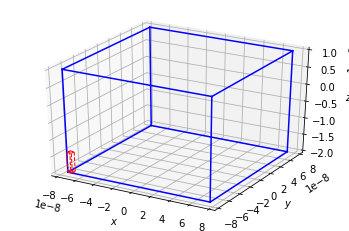

In [3]:
mesh.mpl()

and the two regions we defined are:

In [4]:
mesh.k3d_regions()

Output()

Now, we need to define the system object, and by setting magnetisation saturation, set the geometry to be a disk.

In [5]:
D = {'r1': 1.58e-3, 'r2': -1.58e-3, 'r1:r2': 1.58e-9}
Ms = 3.84e5
A = 8.78e-12

def Ms_fun(pos):
    x, y, z = pos
    if x**2 + y**2 <= (d/2)**2:
        return Ms
    else:
        return 0

system = oc.System(name='bloch-point')
system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, crystalclass='T') + oc.Demag()
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms_fun)

Our sample is now:

In [6]:
system.m.norm.k3d_nonzero()

Output()

The magnetisation in the horizontal cross-section is:

In [7]:
system.m.plane('z').k3d_vectors(head_size=30)

Output()

or using `matplotlib`:

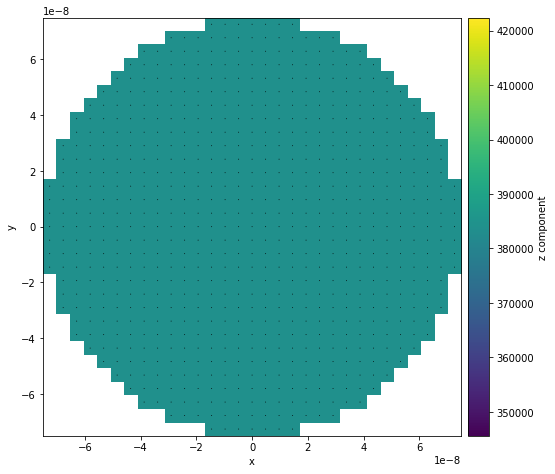

In [8]:
system.m.plane('z').mpl(figsize=(8, 8))

Now, we can minimise the system's energy by using `MinDriver`.

In [9]:
md = oc.MinDriver()
md.drive(system, overwrite=True)

2019/11/28 16:15: Running OOMMF (bloch-point.mif) ... (1.2 s)


The out-of-plane magnetisation component ($m_{z}$) is now:

In [10]:
system.m.z.k3d_voxels(norm_field=system.m.norm)

Output()

We can see that two vortices with different orientation emerged. We can inspect this closer by plotting two layers of magnetisation in two different layers:

In [11]:
import k3d
plot = k3d.plot()
system.m.plane(z=-10e-9, n=(20, 20)).k3d_vectors(plot=plot, color_field=system.m.z, head_size=30)
system.m.plane(z=5e-9, n=(20, 20)).k3d_vectors(plot=plot,color_field=system.m.z, head_size=30)
plot.display()

Output()

We can now plot another cross section and see that the Bloch point emerged.

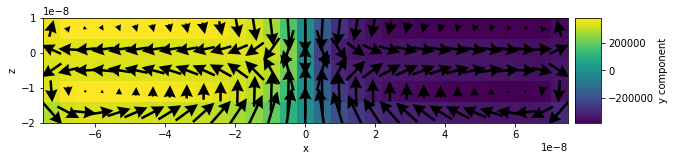

In [12]:
system.m.plane('y').mpl(figsize=(10, 5))

In [13]:
system.m.plane('y').k3d_vectors(color_field=system.m.z, head_size=30)

Output()

In [14]:
system.m.z.plane('y').k3d_voxels(color_field=system.m.z)

Output()

## Conclusion

We looked at the magnetisation configuration in the system with $h_\text{top} = 15\,\text{nm}$. The chiralities of vortex-like states in both layers are the same, but their polarisations are opposite and a Bloch point emerges between them. The energy contribution of the top layer to the total energy of the system becomes significant. Therefore, the top layer now does not follow the polarisation of the bottom layer, but reverses its polarisation to follow the left hand rule. It is now energetically cheaper for the system to host a Bloch point than to tolerate the top layer following the polarisation of the bottom layer and having high energy density.